In [1]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
df = pandas.read_excel('Example data for RLC.xlsx')

In [3]:
df.head()

,"frequency, Hz","Current, mA","Voltage, V",Impedance (Z),1/Z
0,0.5,0.5,1.6,3.200000,0.3125
1,1.0,1.0,1.6,1.600000,0.6250
2,1.5,2.0,1.6,0.800000,1.2500
3,2.0,3.0,1.6,0.533333,1.8750
4,2.2,4.0,1.6,0.400000,2.5000


In [4]:
freq = df['frequency, Hz'[:]]
oneOverZ = df['1/Z'[:]]

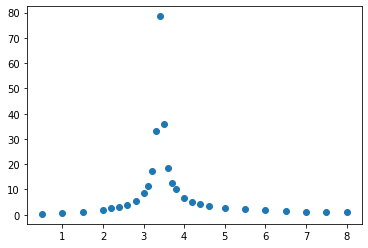

In [5]:
plt.scatter(freq,oneOverZ);

In [6]:
def lorentzian(x, x0=3.5, gamma=1, scale=1):
    pi = np.pi
    L = 1/pi * scale* 0.5* gamma * (1/((x-x0)**2 + (0.5*gamma)**2))
    return L

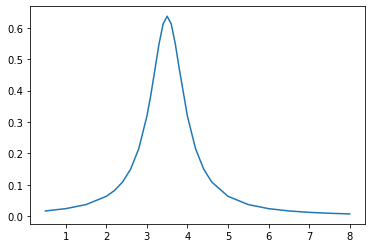

In [7]:
plt.plot(freq,lorentzian(freq));

In [8]:
params, params_covariance = optimize.curve_fit(lorentzian, freq, oneOverZ, p0=[3.5, 1, 70])
print(params)

[ 3.40303835  0.20603319 24.72121445]


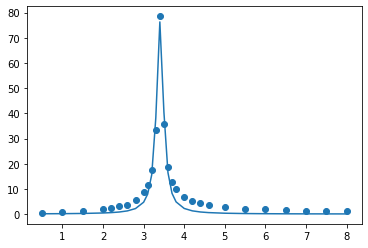

In [9]:
plt.plot(freq,lorentzian(freq, params[0], params[1], params[2]))
plt.scatter(freq,oneOverZ);